In [1]:
#this is a script for compiling data that has been fully parallelized on the cluster. 

import pandas as pd
import matplotlib.pyplot as plt
import string
import fnmatch
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import statistics
import paramiko
from paramiko import SSHClient
from scp import SCPClient



In [2]:
#Local variables: figure out how to automate.

JobIDint = 1398589
Clade = "birds"
JOBID = str(JobIDint)
tree_sizes_1 = list(range(10,605,5))
tree_sizes_2 = []
tree_sizes = tree_sizes_1 + tree_sizes_2
print(tree_sizes)
#tree_sizes = [10,25,50,75,100,350,500,700,900,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000] # define the tree sizes that we have data for (aka: parameter combinations)
metric = 'mpd'
num_files = 1 #predetermine the number of files/runs. This is equivalent to the array_ID from the r script. 
transfer = True;

[10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600]


In [3]:
#establish connection with remote server and transfer files from filenam
#DO NOT RUN THIS UNLESS THE FILES HAVE NOT BEEN TRANSFERRED

if(transfer):
    hoffman2_path_output = '/u/home/m/mchari/bird/Parallel_Hoffman_full/' + Clade + JOBID + '_output_files'
    ssh_ob = SSHClient()
    ssh_ob.load_system_host_keys()
    ssh_ob.connect('hoffman2.idre.ucla.edu', username = 'mchari', password= 'Xf4p4D24')
    scp = SCPClient(ssh_ob.get_transport())
    scp.get(hoffman2_path_output, recursive = True)
    print("transfer is done")
    transfer = False;
else:
    print("transfer already complete")
    
#set up local direrctory and establish folder as target

transfer is done


In [4]:
cwd = os.getcwd()
target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"

In [ ]:
#for some reason, only went until 430 

In [5]:
print(target_directory)
#look at one mpd randomization from one trial to see sample data structure. 
target_file_get = target_directory +  "100_3992out.csv"
print(target_file_get)
df = pd.read_csv(target_file_get)
df.index =['pd', 'mpd', "mntd"]
print(df)
#df.iloc[0]['mpd.rnd']

stat_temp = df.loc['mpd']
print(stat_temp)


/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/1398589_output_files/
/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/1398589_output_files/100_3992out.csv


FileNotFoundError: [Errno 2] No such file or directory: '/Users/mayachari/Desktop/bird/Parallel_Hoffman_full/1398589_output_files/100_3992out.csv'

In [6]:
# Create dictionary class

class my_dictionary(dict):
 
  # __init__ function
  def __init__(self):
    self = dict()
 
  # Function to add key:value
  def add(self, key, value):
    self[key] = value


In [7]:

#right now the mean part of this function is redundant but I'm keeping it in just in case. 
#avg_mpd_rand = []

#choice of 2 statistics: mpd, mntd
def div_stats(tree_sizes, JobIDint, target_directory, target_statistic):
    dict_mpd = my_dictionary() #initialize new dictionary 
    
    #i don't know why i did it this way. can't remember. 
    if target_statistic == "mpd":
        target_val = 'mpd'
    elif target_statistic == "mntd":
        target_val = 'mntd'
    elif target_statistic == "pd":
        target_val = 'pd'
    else:
        print("error") #add an error
    for i in tree_sizes:
        size = str(i) #gets the i'th data. 
        count = 0
        mpd_sum = 0
        array_temp = []
        name = target_statistic + str(i)
        for file in os.listdir(target_directory): #search every file in the target directory. 
            if file.startswith(size + "_"):
                direct = target_directory + file #go to the directory
                temp_df = pd.read_csv(direct) #read in the csv. 
                temp_df.index =['pd', 'mpd', "mntd"]
                stat_temp = temp_df.loc[target_val]
                #mpd_sum = mpd_sum + temp_df.iloc[0][target_val]
                #count  = count + 1
                array_temp.extend(stat_temp)
        #average_mpd_rnd.append(mpd_sum/count)
        dict_mpd.add(name, array_temp)
    
    return dict_mpd
    
        #average_mpd_rnd.append(mpd.rand)




In [8]:
#TODO: write this to a csv somehow so I can delete that massive file. 

new_mpd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mpd')
new_mntd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'mntd')
new_pd_smallvals = div_stats(tree_sizes, JobIDint, target_directory, 'pd')


In [10]:
#
new_mpd = new_mpd_smallvals
new_mntd = new_mntd_smallvals
new_pd = new_pd_smallvals

print(new_mpd)

{'mpd10': [98.4321989333333, 89.8442756666667, 99.4542228222222, 45.2833606222222, 103.550265133333, 88.9171946444445, 111.225544688889, 87.1072620444445, 119.062700355556, 93.2382914666667, 105.512272355556, 105.530846911111, 108.408494688889, 105.077416, 115.034277355556, 108.607745733333, 104.203804288889, 110.461737444444, 104.884545711111, 88.3703381111111, 97.8106995333333, 100.487482644444, 75.4741770222222, 111.745996, 109.571750533333, 101.530635022222, 100.904292177778, 88.5808175777778, 88.2414221555556, 97.1543901111111, 105.031111222222, 94.0864944888889, 115.0543384, 107.880843, 74.8467733777778, 94.8159458666667, 108.7773984, 106.9861848, 109.846686266667, 93.2230036, 86.6974344666667, 114.314305977778, 95.8502666666667, 99.3883229333333, 113.456087022222, 111.309530911111, 91.8136452222222, 114.825348955556, 84.5504362888889, 105.305704955556, 114.881660266667, 113.557270622222, 81.8407997777778, 93.7978787333333, 101.743568311111, 99.6149987333333, 109.767565533333, 90

In [23]:
data = mpd['mpd10']
plt.hist(data, bins =30)
st.t.interval(alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=st.sem(data)) 


#using classical statistics and assuming normal distribution 
std = statistics.stdev(data)
mean = np.mean(data)
lower_level = mean-1.960*(std/(np.sqrt(len(data)+1)))
lower_level
upper_level = mean+1.960*(std/(np.sqrt(len(data)+1)))
upper_level
#X  ±  Z s√n 


upper_bound_bootstrap = np.percentile(data,97.5)
lower_bound_bootstrap = np.percentile(data,2.5)

print(lower_bound_bootstrap, upper_bound_bootstrap)



NameError: name 'mpd' is not defined

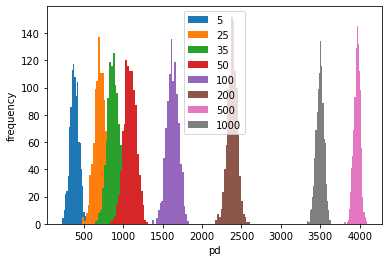

In [90]:
#print(dict_mpd.keys())
#print(np.mean(dict_mpd['mpd10']))
#print(np.mean(dict_mpd['mpd10']))
#print(new_mpd['mpd10'])
plt.hist(new_pd['pd10'],bins = 20)
#plt.hist(new_mpd['mpd10'],bins = 20)
#plt.hist(new_mpd['mpd15'],bins = 20)
#plt.hist(new_mpd['mpd20'],bins = 20)
plt.hist(new_pd['pd25'],bins = 20)
#plt.hist(new_mpd['mpd30'],bins = 20)
plt.hist(new_pd['pd35'],bins = 20)
#plt.hist(new_mpd['mpd40'],bins = 20)
#plt.hist(new_mpd['mpd45'],bins = 20)
plt.hist(new_pd['pd50'],bins = 20)
plt.hist(new_pd['pd100'],bins = 20)
plt.hist(new_pd['pd200'],bins = 20)
plt.hist(new_pd['pd500'],bins = 20)
plt.hist(new_pd['pd400'],bins = 20)
#plt.hist(new_mpd['mpd50'])
#plt.hist(new_mpd['mpd100'])
#plt.hist(new_mpd['mpd1000'])
#plt.title('expected pd histograms across multiple tree sizes')
plt.xlabel('pd')
plt.ylabel('frequency')
labels = ("5","25",  "35", "50", "100", "200", "500", "1000")
plt.legend(labels)
plt.savefig('pd_histograms.jpg', dpi=300)

In [11]:
#TODO: make function to get confidence interval and means. 
#CI TODO: check whether z or t is used. don't know variance or mean. Should use t distribution. 
def CI_conglomerate(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        mean_temp = np.mean(dictionary[key])
        CI_temp = st.t.interval(confidence=0.95, df=len(dictionary[key])-1, loc=np.mean(dictionary[key]), scale=st.sem(dictionary[key]))
        low_array.append(CI_temp[0])
        high_array.append(CI_temp[1])
        mean_array.append(mean_temp)
    return(low_array,high_array,mean_array)

new_CI = CI_conglomerate(new_mpd)
print(new_CI)

([99.98021554882753, 100.07022636297745, 99.24956798933445, 100.57856475249287, 99.94409926120676, 100.21284516104848, 99.70734840990555, 99.90354900793142, 99.86666958811949, 100.02743208501394, 100.03349032231127, 100.157837988585, 100.05263667365453, 100.069234985345, 99.78151410982447, 100.30656983810677, 100.1005855451815, 100.27323017123456, 100.13705018826673, 100.07201635228134, 100.17274486159467, 100.21575978266078, 100.09834413825078, 100.24047178592139, 100.26339428059512, 100.05817068697935, 100.24995970000602, 100.17358317471322, 100.23838727374327, 100.3283985162791, 100.15004226028148, 100.18331287767512, 100.22823580067998, 100.19567597839885, 100.41539452841492, 100.18613524863358, 100.07933890426206, 100.1522419398121, 100.22815815307331, 100.15365536668068, 100.36131715059646, 100.21255894098597, 100.21266949021351, 100.25814784462703, 100.15907318920475, 100.0035787050907, 100.20720150700562, 100.23128328989611, 100.27208601874887, 100.26724125963581, 100.041015381

In [12]:
def CI_bootstrap(dictionary): #assuming normal distribution
    low_array = []
    high_array = []
    mean_array = []
    for key in dictionary.keys():
        print(key)
        data_temp = dictionary[key]
        upper_bound_bootstrap = np.percentile(data_temp,97.5)
        print(upper_bound_bootstrap)
        lower_bound_bootstrap = np.percentile(data_temp,2.5)
        low_array.append(lower_bound_bootstrap)
        high_array.append(upper_bound_bootstrap)
        mean_array.append(np.mean(dictionary[key]))
    return(low_array,high_array,mean_array)



In [13]:
CI_mpd_bootstrap = CI_bootstrap(new_mpd) #CI for mpd

CI_mntd_bootstrap = CI_bootstrap(new_mntd)  #CI for mntd

CI_pd_bootstrap = CI_bootstrap(new_pd)

mpd10
116.0024967349999
mpd15
112.97238452285687
mpd20
111.31341893078917
mpd25
110.64708504883316
mpd30
110.1534182602302
mpd35
109.05231854445375
mpd40
108.05648782253198
mpd45
108.3619890611617
mpd50
107.79178082983682
mpd55
107.35276177767678
mpd60
106.96036430868635
mpd65
106.94394859129787
mpd70
106.63121050971034
mpd75
106.2454377094237
mpd80
105.97541809901112
mpd85
105.94781539609238
mpd90
105.51296616516883
mpd95
105.53114735722282
mpd100
105.15591669028285
mpd105
105.35061669922177
mpd110
105.35232693305673
mpd115
104.80301280426413
mpd120
105.06712716134118
mpd125
105.1382341212515
mpd130
104.62645437278488
mpd135
104.65499979159182
mpd140
104.4877266111027
mpd145
104.59025936870675
mpd150
104.60817966675154
mpd155
104.34103471283622
mpd160
104.43067152625197
mpd165
104.02602509343647
mpd170
104.08713196848417
mpd175
104.07638236829555
mpd180
104.16763149812562
mpd185
103.80160194967948
mpd190
103.907775635979
mpd195
103.90042896708685
mpd200
103.51927344969212
mpd205
103.8

In [54]:
#target_directory = os.getcwd() + "/"+ JOBID +"_output_files/"


#os.listdir(target_directory)

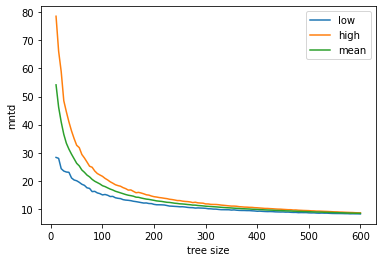

In [14]:
#print(average_mpd_rnd)

plt.plot(tree_sizes, CI_mntd_bootstrap[0])
plt.plot(tree_sizes, CI_mntd_bootstrap[1])
plt.plot(tree_sizes,CI_mntd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mnpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mntd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mntd')
plt.legend(labels2)
plt.savefig('mntd_95CI_bird.jpg', dpi=300)



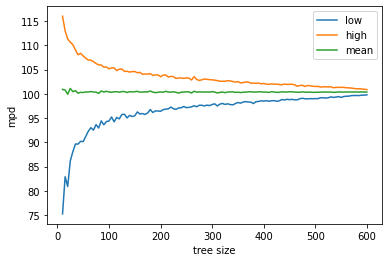

In [15]:
plt.plot(tree_sizes, CI_mpd_bootstrap[0])
plt.plot(tree_sizes, CI_mpd_bootstrap[1])
plt.plot(tree_sizes,CI_mpd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("mpd")
plt.xlabel("sample size")
#plt.title('95% CI for expected Mpd across tree sizes')
plt.xlabel('tree size')
plt.ylabel('mpd')
plt.legend(labels2)
plt.savefig('mpd_95CI_bird.jpg', dpi=300)



In [ ]:
plt.plot(tree_sizes, CI_pd_bootstrap[0])
plt.plot(tree_sizes, CI_pd_bootstrap[1])
plt.plot(tree_sizes,CI_pd_bootstrap[2])
labels2 = ("low", "high", "mean")
plt.ylabel("pd")
plt.xlabel("sample size")
#plt.title('95% CI for expected [d] across tree sizes')
plt.xlabel('tree size')
plt.ylabel('pd')
plt.legend(labels2)
plt.savefig('pd_95CI_bird.jpg', dpi=1200)

In [17]:
CI_export_mpd = pd.DataFrame(CI_mpd_bootstrap)
CI_colnames = dict.keys(new_mpd)
CI_export_mpd.columns = CI_colnames
CI_export_mpd.index = ["Low", "High", "Mean"]
CI_export_mpd.to_csv("CI_mpd_output_bootstrap_bird.csv")


In [18]:
CI_export_mntd = pd.DataFrame(CI_mntd_bootstrap)
CI_colnames = dict.keys(new_mntd)
CI_export_mntd.columns = CI_colnames
CI_export_mntd.index = ["Low", "High", "Mean"]
CI_export_mntd.to_csv("CI_mntd_output_bootstrap_bird.csv")

In [19]:
CI_export_pd = pd.DataFrame(CI_pd_bootstrap)
CI_colnames = dict.keys(new_pd)
CI_export_pd.columns = CI_colnames
CI_export_pd.index = ["Low", "High", "Mean"]
CI_export_pd.to_csv("CI_pd_output_bootstrap_bird.csv")